In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.datasets  import load_iris

from six import StringIO
from IPython.display import Image
import pydotplus

# Data Preparation

In [3]:
df = pd.read_csv("patient2025 - patient2025.csv")

In [4]:
df

,HN,FBS,BMI,Diabetes,Chorestorol,age,hypertension,"vegetarian (1= yes, 0=no)",Marriage Status,Exercise (min/week),Living Area,stroke
0,11223,228.69,34.0,yes,201-220,71.00,1,1,Yes,0.0,Bangkok,1
1,8887,202.21,NaN,No,180-200,52.00,1,0,Yes,90.0,Country,1
2,5666,105.92,30.5,yes,180-200,78.00,1,1,Yes,0.0,Country,1
3,460182,171.23,35.0,No,221-260,54.00,1,0,Yes,0.0,Bangkok,1
4,166665,174.12,28.0,No,180-200,79.00,1,0,Yes,90.0,Country,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,60211,90.51,18.9,yes,Unknown,1.40,0,0,No,120.0,Bangkok,0
996,53279,118.87,16.3,yes,Unknown,0.24,0,0,No,120.0,Country,0
997,61715,56.42,31.8,yes,180-200,55.00,0,0,Yes,0.0,Country,0
998,37830,73.67,21.0,No,Unknown,29.00,0,0,No,0.0,Bangkok,0


In [5]:
df['stroke'].value_counts()  

stroke
0    751
1    249
Name: count, dtype: int64

In [6]:
df.isnull().sum()

HN                            0
FBS                           0
BMI                          60
Diabetes                      0
Chorestorol                   0
age                           0
hypertension                  0
vegetarian (1= yes, 0=no)     0
Marriage Status               0
Exercise (min/week)          26
Living Area                   0
stroke                        0
dtype: int64

In [7]:
# convert data into number for DecisiontreeClassifier
df['Diabetes'] = df['Diabetes'].replace({'yes': 1, 'No': 0, 'No': 0})
df['hypertension'] = df['hypertension'].replace({'Yes': 1, 'No': 0})
df['Marriage Status'] = df['Marriage Status'].replace({'Yes': 1, 'No': 0})
df['Living Area'] = df['Living Area'].replace({'Bangkok': 1, 'Country': 0})
df['Chorestorol'] = df['Chorestorol'].replace('Unknown', np.nan)

C:\Users\Nut\AppData\Local\Temp\ipykernel_16288\4292279877.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diabetes'] = df['Diabetes'].replace({'yes': 1, 'No': 0, 'No': 0})
C:\Users\Nut\AppData\Local\Temp\ipykernel_16288\4292279877.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Marriage Status'] = df['Marriage Status'].replace({'Yes': 1, 'No': 0})
C:\Users\Nut\AppData\Local\Temp\ipykernel_16288\4292279877.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. 

In [8]:
df = df.dropna()

In [9]:
def chorestoral_mean(value):
    if isinstance(value, str):
        if '-' in value:
            try:
                lower, upper = map(float, value.split('-'))
                return (lower + upper) / 2
            except ValueError:
                return np.nan
    return value

In [10]:
df['Chorestorol'] = df['Chorestorol'].apply(chorestoral_mean)

C:\Users\Nut\AppData\Local\Temp\ipykernel_16288\3676390341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Chorestorol'] = df['Chorestorol'].apply(chorestoral_mean)


In [11]:
df

,HN,FBS,BMI,Diabetes,Chorestorol,age,hypertension,"vegetarian (1= yes, 0=no)",Marriage Status,Exercise (min/week),Living Area,stroke
0,11223,228.69,34.0,1,210.5,71.0,1,1,1,0.0,1,1
2,5666,105.92,30.5,1,190.0,78.0,1,1,1,0.0,0,1
3,460182,171.23,35.0,0,240.5,54.0,1,0,1,0.0,1,1
4,166665,174.12,28.0,0,190.0,79.0,1,0,1,90.0,0,1
5,56744,186.21,30.0,1,210.5,80.0,1,0,1,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
987,28122,77.44,21.4,0,210.5,37.0,0,0,1,90.0,0,0
990,66922,148.24,32.2,1,210.5,61.0,1,1,0,0.0,0,0
992,42786,72.93,27.1,1,210.5,82.0,0,1,1,90.0,0,0
994,24174,124.45,24.6,0,190.0,50.0,0,0,1,60.0,0,0


# Feature Selection

In [12]:
feature_cols = ['HN','FBS' , 'BMI','Diabetes','Chorestorol','age','hypertension' ,'vegetarian (1= yes, 0=no)','Marriage Status','Exercise (min/week)','Living Area' ]
x = df[feature_cols]
y = df['stroke']



In [13]:
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size= 0.3 , random_state=67 )

In [14]:
clf = DecisionTreeClassifier()

clf = clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
print("Accuracy :" ,metrics.accuracy_score(y_test , y_pred))

Accuracy : 0.6847290640394089


# Visualization

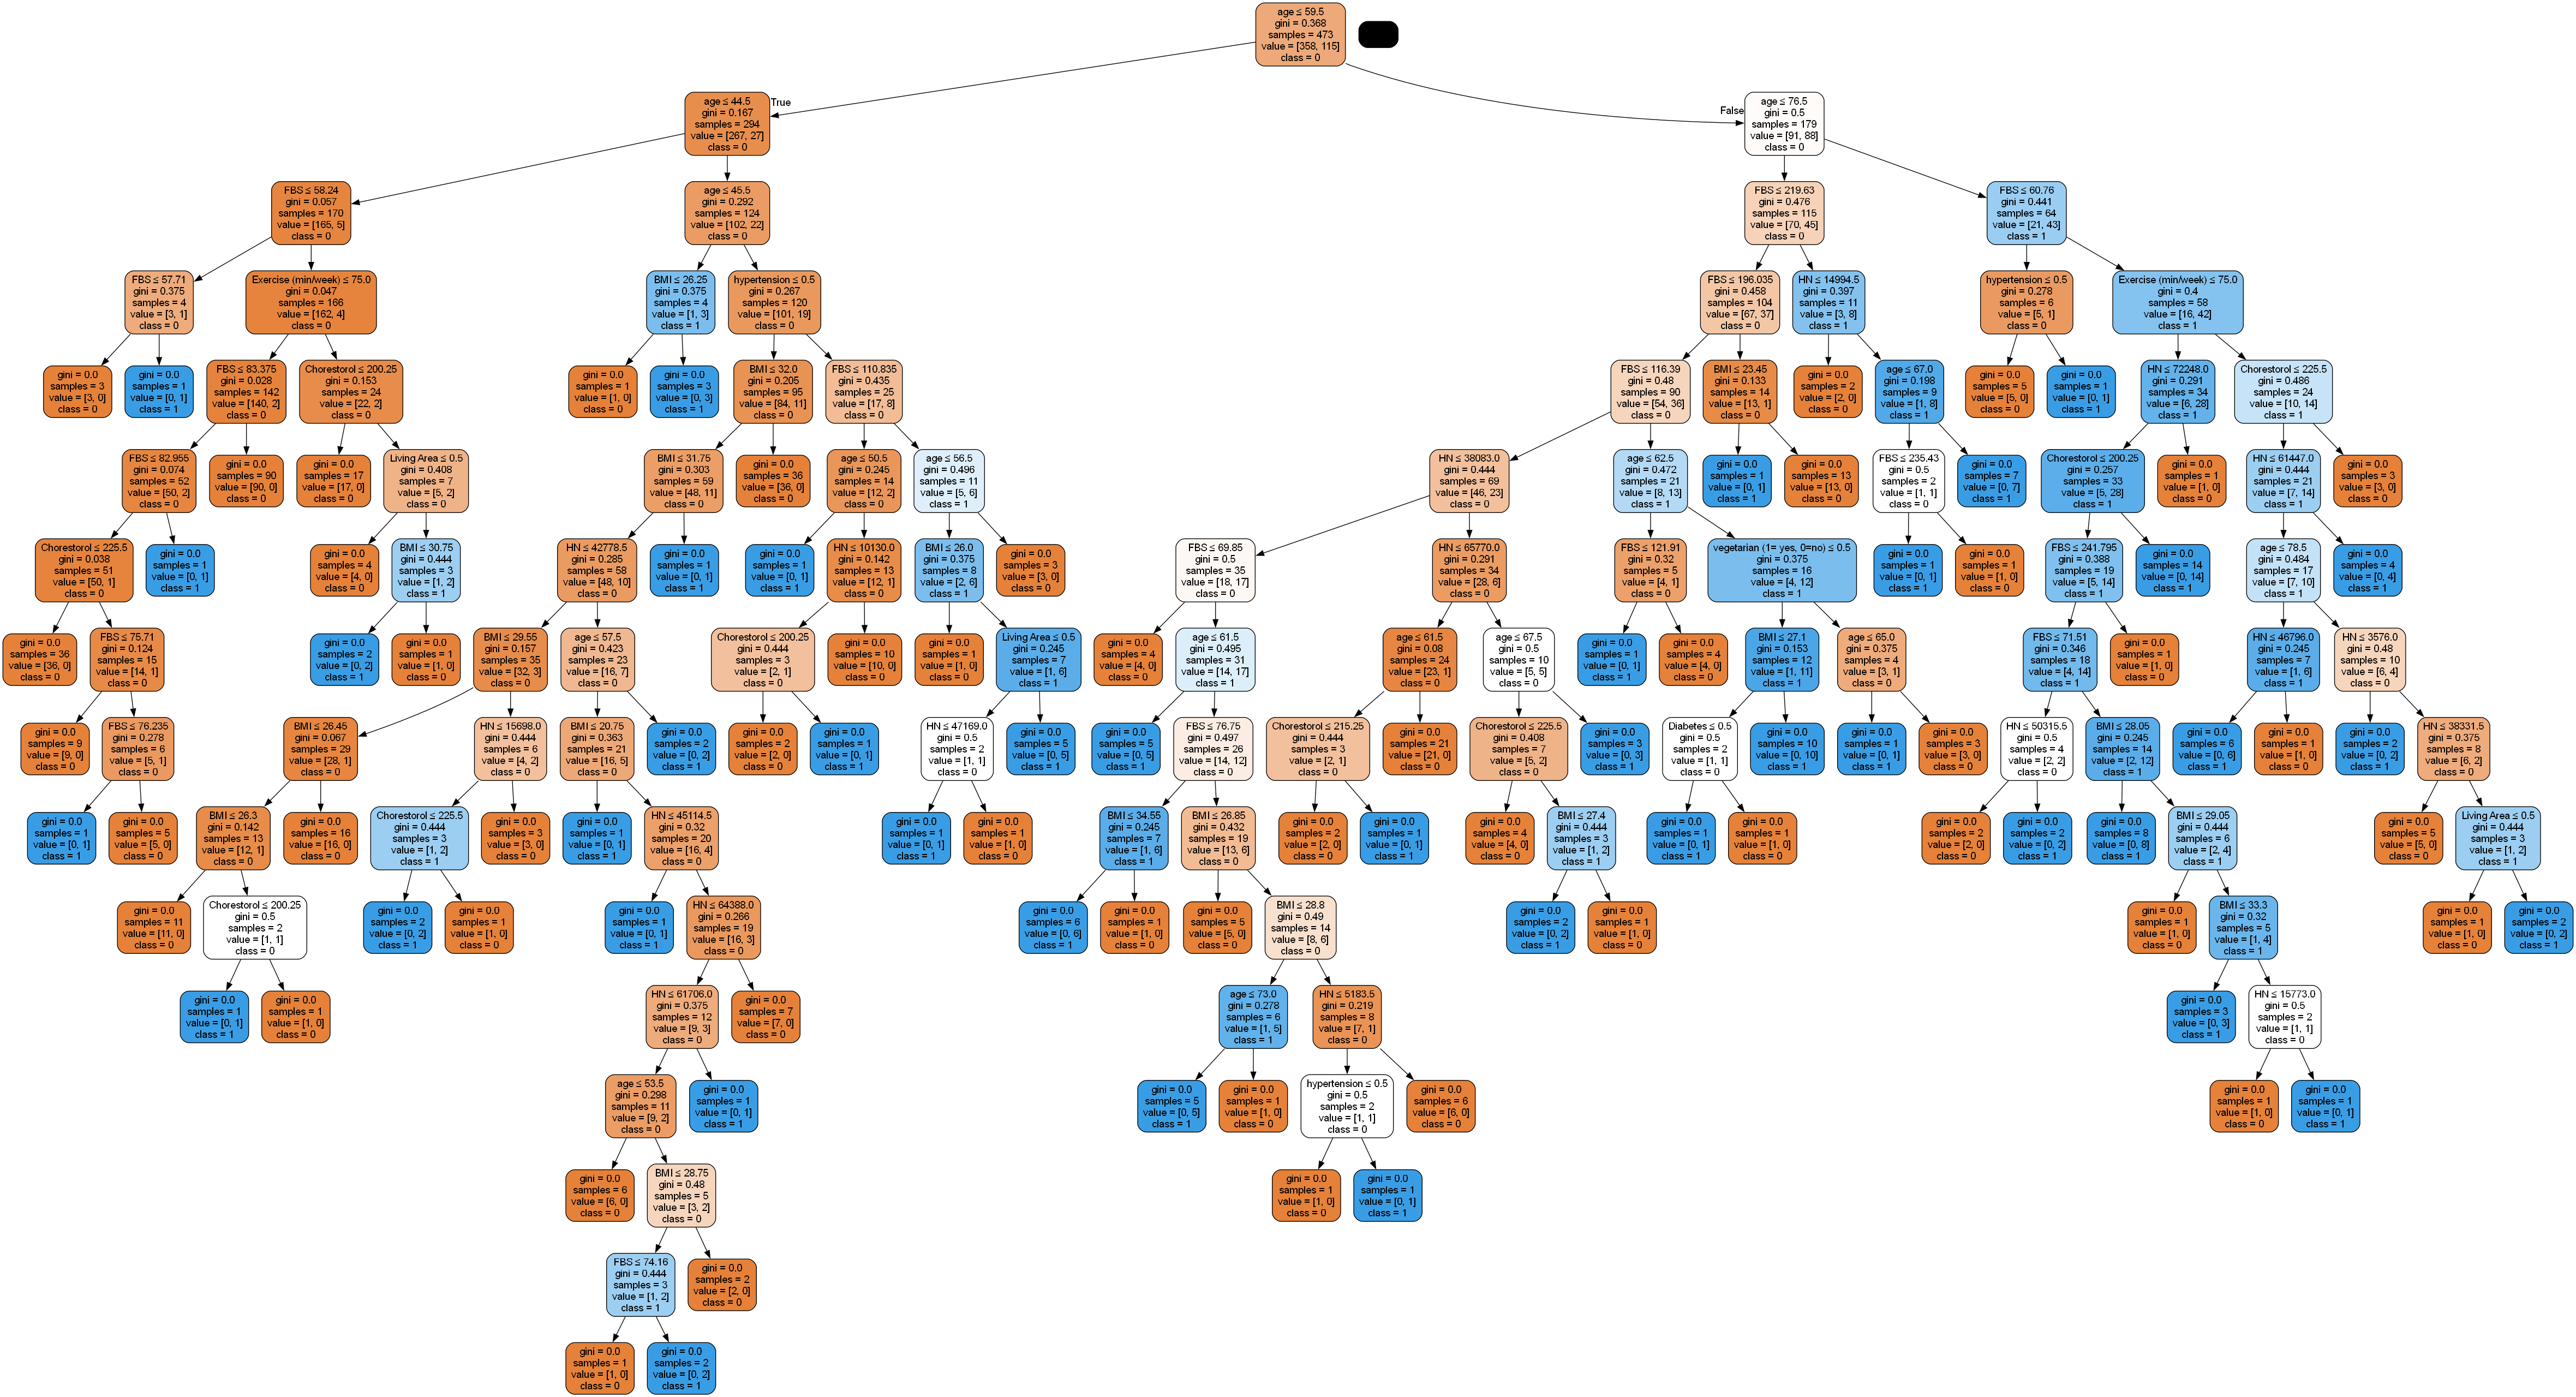

In [15]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('preprune-stroke.png')
Image(graph.create_png())

# Model Training

In [16]:
param_grid = {
    "max_depth": [2, 3, 4, 5, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "criterion": ["gini", "entropy"],
}
base_dt = DecisionTreeClassifier(random_state=67 , class_weight='balanced')

In [17]:
grid = GridSearchCV(
    estimator=base_dt,
    param_grid=param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=1
)

grid.fit(x_train, y_train)

print("Best params from CV :", grid.best_params_)
print("Best CV f1_macro    :", grid.best_score_)

best_clf = grid.best_estimator_

y_train_pred = best_clf.predict(x_train)
y_test_pred  = best_clf.predict(x_test)

print("\nTrain accuracy :", metrics.accuracy_score(y_train, y_train_pred))
print("Test  accuracy :", metrics.accuracy_score(y_test, y_test_pred))

print("\nConfusion matrix (test)")
print(metrics.confusion_matrix(y_test, y_test_pred))

print("\nClassification report (test)")
print(metrics.classification_report(y_test, y_test_pred, digits=3))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best params from CV : {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV f1_macro    : 0.6836090886486876

Train accuracy : 0.7695560253699789
Test  accuracy : 0.7192118226600985

Confusion matrix (test)
[[108  38]
 [ 19  38]]

Classification report (test)
              precision    recall  f1-score   support

           0      0.850     0.740     0.791       146
           1      0.500     0.667     0.571        57

    accuracy                          0.719       203
   macro avg      0.675     0.703     0.681       203
weighted avg      0.752     0.719     0.729       203



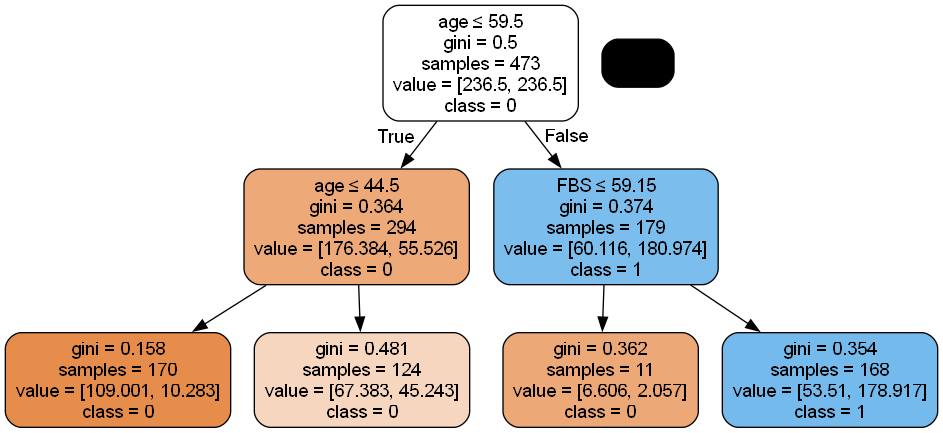

In [18]:
dot_data = StringIO()
export_graphviz(best_clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('postpruned-stroke.png')
Image(graph.create_png())